<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/ML_Week_6_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Clustering Dataset Kampanye Pemasaran

## 1. Pendahuluan
Pada notebook ini, kita akan melakukan analisis clustering pada dataset kampanye pemasaran untuk mengidentifikasi segmen-segmen pelanggan. Analisis ini menggunakan dua metode clustering yang populer dan akan dievaluasi performanya menggunakan berbagai metrik.

### Dataset
Dataset yang digunakan adalah `clusteringcampaign.csv` yang berisi data demografis dan perilaku belanja pelanggan.

### Metode Clustering yang Digunakan
1. K-Means Clustering
2. Hierarchical Clustering (Agglomerative)

### Metrik Evaluasi
- Elbow Method (untuk menentukan jumlah cluster optimal)
- Silhouette Coefficient
- Calinski-Harabasz Index
- Davies-Bouldin Index

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from yellowbrick.cluster import KElbowVisualizer

# Set style untuk visualisasi
plt.style.use('ggplot')
sns.set_palette('viridis')

# Import data
df = pd.read_csv('clusteringcampaign.csv', sep='\t')

# Tampilkan informasi dataset
print("Informasi Dataset:")
df.info()
print("\n5 baris pertama dataset:")
df.head()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases  

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2. Pra-pemrosesan Data (Preprocessing)
Pada tahap ini, kita akan membersihkan data, menangani nilai yang hilang, dan melakukan penskalaan agar fitur-fitur numerik memiliki rentang yang sama.

In [ ]:
# Pengecekan nilai yang hilang (missing values)
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Mengisi nilai yang hilang pada kolom 'Income' dengan nilai median
df['Income'].fillna(df['Income'].median(), inplace=True)
print("\nMissing values setelah diisi:")
print(df.isnull().sum().loc['Income'])

# Memilih fitur-fitur numerik yang relevan untuk clustering
# Fitur ini merepresentasikan nilai dan perilaku belanja pelanggan
features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_for_clustering = df[features]

# Normalisasi/Penskalaan data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
scaled_df = pd.DataFrame(scaled_data, columns=features)

Jumlah Missing Values per Kolom:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Missing values setelah diisi:
0


/tmp/ipython-input-3-3894506289.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


## 3. K-Means Clustering
Kita mulai dengan metode K-Means. Pertama, kita akan menentukan jumlah cluster (k) yang optimal menggunakan Elbow Method.

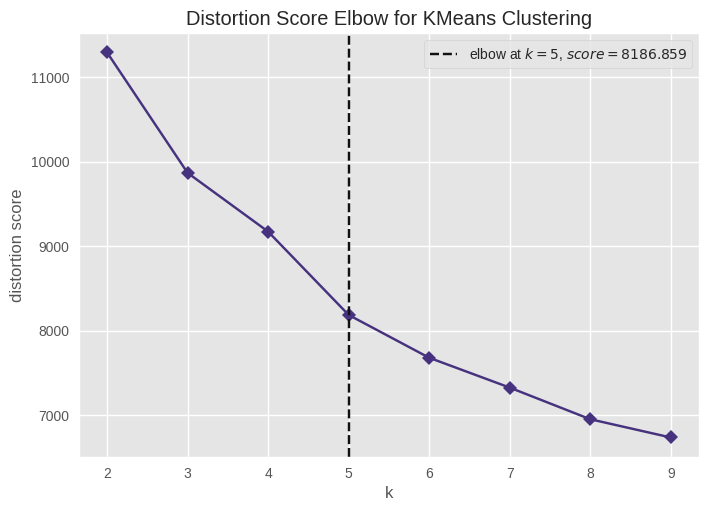

Jumlah cluster optimal yang ditemukan: 5


In [ ]:
# Elbow Method untuk menentukan jumlah cluster optimal
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(scaled_df)
visualizer.show()

# Implementasi K-Means dengan jumlah cluster optimal
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Menambahkan label cluster ke dataset asli
df['KMeans_Cluster'] = kmeans_labels

print(f"Jumlah cluster optimal yang ditemukan: {optimal_k}")

## 4. Hierarchical Clustering
Selanjutnya, kita akan mengimplementasikan Hierarchical Clustering. Dendrogram akan divisualisasikan untuk melihat struktur hierarki data.

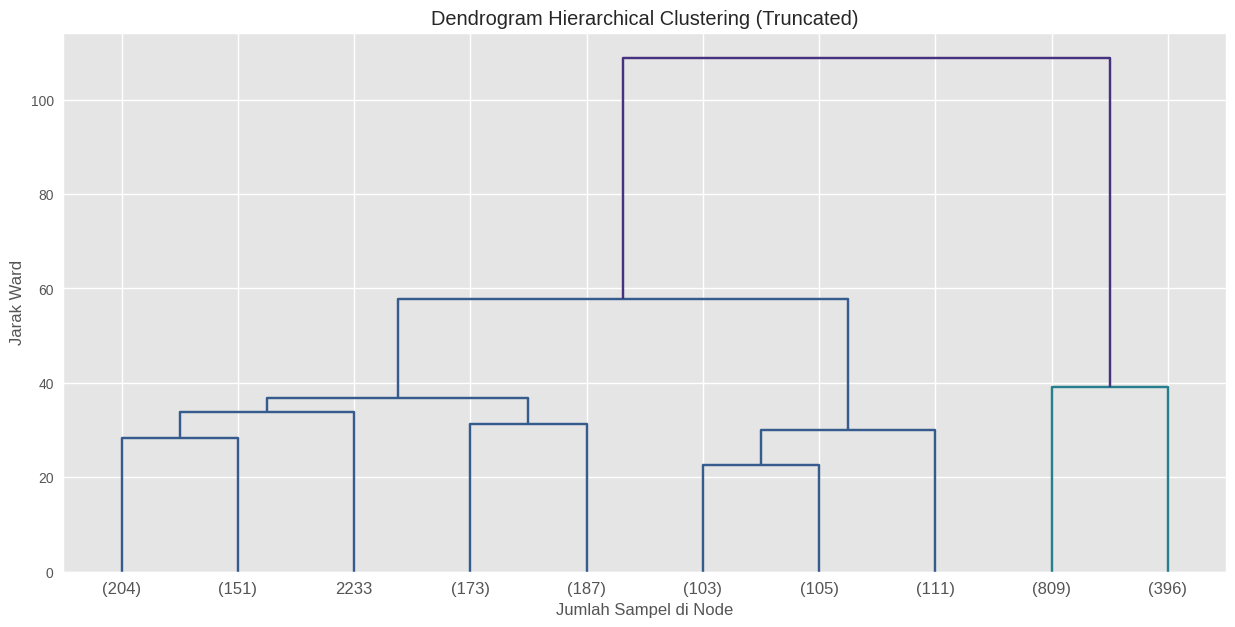

In [ ]:
# Membuat linkage matrix untuk dendrogram
plt.figure(figsize=(15, 7))
linked = linkage(scaled_df, method='ward')

# Membuat dendrogram
# Kita potong dendrogram agar lebih mudah dibaca (menampilkan 10 cluster terakhir)
dendrogram(linked,
           orientation='top',
           p=10,
           truncate_mode='lastp',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Dendrogram Hierarchical Clustering (Truncated)')
plt.xlabel('Jumlah Sampel di Node')
plt.ylabel('Jarak Ward')
plt.show()

# Implementasi Hierarchical Clustering dengan jumlah cluster yang sama
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_df)

# Menambahkan label cluster ke dataset asli
df['Hierarchical_Cluster'] = hierarchical_labels

## 5. Evaluasi Performa Clustering
Pada bagian ini, kita akan mengevaluasi dan membandingkan hasil dari kedua metode clustering menggunakan metrik kuantitatif.

In [ ]:
def evaluate_clustering(data, labels, method_name):
    """Fungsi untuk menghitung dan menampilkan metrik evaluasi clustering."""
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    davies = davies_bouldin_score(data, labels)

    print(f"--- Evaluasi {method_name} ---")
    print(f"Silhouette Score: {silhouette:.4f} (Semakin tinggi semakin baik)")
    print(f"Calinski-Harabasz Index: {calinski:.4f} (Semakin tinggi semakin baik)")
    print(f"Davies-Bouldin Index: {davies:.4f} (Semakin rendah semakin baik)")
    print("-----------------------------------")

print("Evaluasi K-Means Clustering:")
evaluate_clustering(scaled_df, kmeans_labels, "K-Means")

print("\nEvaluasi Hierarchical Clustering:")
evaluate_clustering(scaled_df, hierarchical_labels, "Hierarchical")

Evaluasi K-Means Clustering:
--- Evaluasi K-Means ---
Silhouette Score: 0.2440 (Semakin tinggi semakin baik)
Calinski-Harabasz Index: 664.2832 (Semakin tinggi semakin baik)
Davies-Bouldin Index: 1.5259 (Semakin rendah semakin baik)
-----------------------------------

Evaluasi Hierarchical Clustering:
--- Evaluasi Hierarchical ---
Silhouette Score: 0.1850 (Semakin tinggi semakin baik)
Calinski-Harabasz Index: 566.6436 (Semakin tinggi semakin baik)
Davies-Bouldin Index: 1.8850 (Semakin rendah semakin baik)
-----------------------------------


## 6. Visualisasi Hasil Clustering
Kita akan memvisualisasikan hasil segmentasi untuk melihat bagaimana pelanggan dikelompokkan berdasarkan pendapatan (`Income`) dan pengeluaran untuk anggur (`MntWines`).

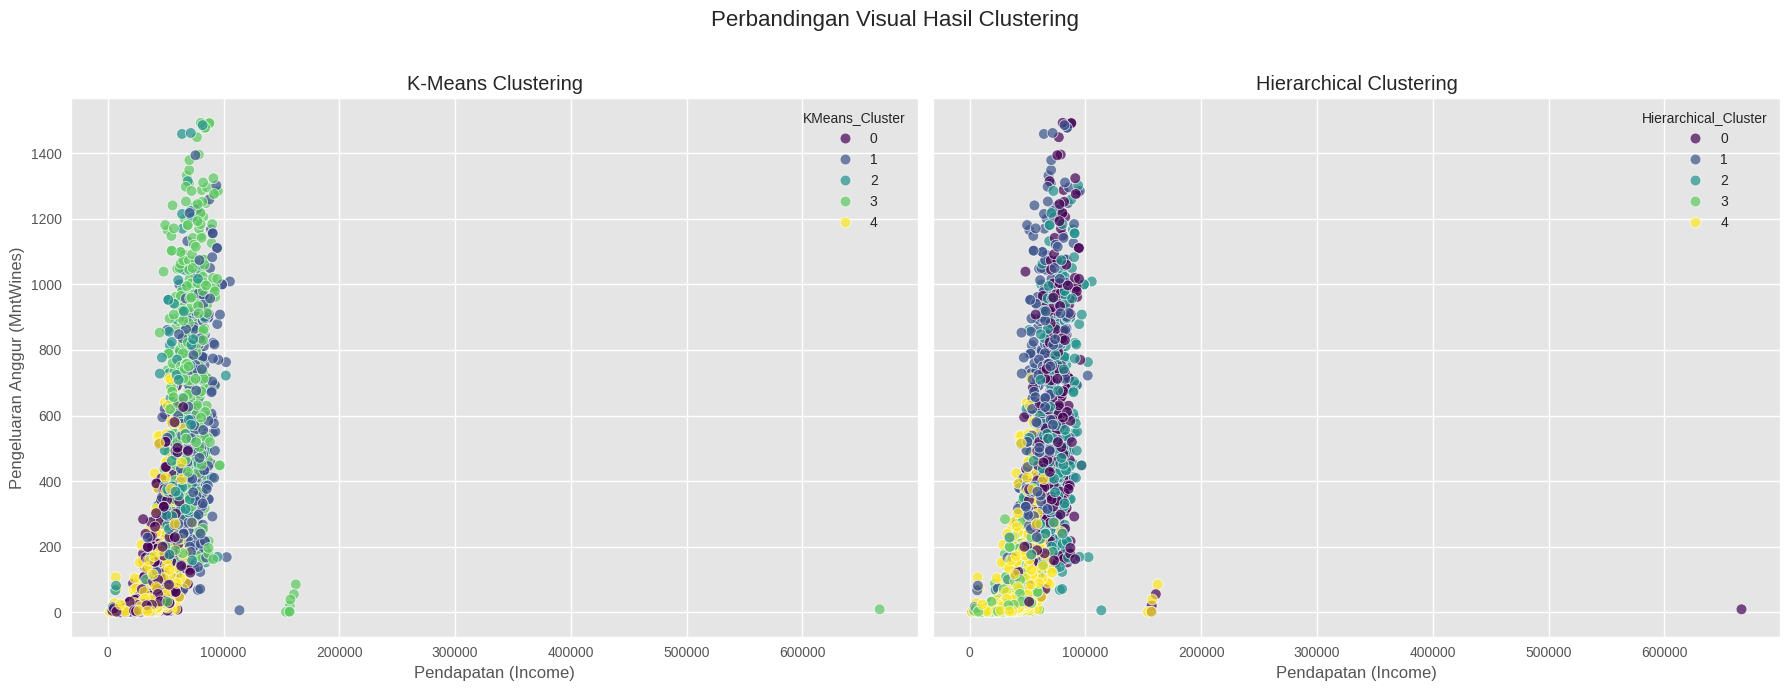

In [ ]:
# Membuat subplot untuk perbandingan
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
fig.suptitle('Perbandingan Visual Hasil Clustering', fontsize=16)

# Visualisasi K-Means Clustering
sns.scatterplot(ax=axes[0], data=df, x='Income', y='MntWines',
                hue='KMeans_Cluster', palette='viridis', s=60, alpha=0.7)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Pendapatan (Income)')
axes[0].set_ylabel('Pengeluaran Anggur (MntWines)')

# Visualisasi Hierarchical Clustering
sns.scatterplot(ax=axes[1], data=df, x='Income', y='MntWines',
                hue='Hierarchical_Cluster', palette='viridis', s=60, alpha=0.7)
axes[1].set_title('Hierarchical Clustering')
axes[1].set_xlabel('Pendapatan (Income)')
axes[1].set_ylabel('') # Hapus label y untuk kerapian

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 7. Analisis dan Interpretasi Hasil

### Penjelasan Metrik Evaluasi

1.  **Silhouette Coefficient**: Mengukur seberapa baik sebuah objek ditempatkan di dalam clusternya dibandingkan dengan cluster lain. Nilai berkisar dari -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan cluster yang lebih padat dan terpisah dengan baik.

2.  **Calinski-Harabasz Index**: Dikenal juga sebagai *Variance Ratio Criterion*. Metrik ini mengukur rasio antara dispersi antar-cluster dan dispersi di dalam cluster. Nilai yang lebih tinggi menunjukkan performa clustering yang lebih baik.

3.  **Davies-Bouldin Index**: Mengukur rata-rata 'kemiripan' antara setiap cluster dengan cluster yang paling mirip dengannya. Nilai yang lebih rendah menunjukkan pemisahan cluster yang lebih baik, di mana cluster-cluster lebih padat dan lebih jauh satu sama lain.


## 8. Kesimpulan

Berdasarkan hasil analisis dan evaluasi kuantitatif, berikut adalah kesimpulan yang dapat ditarik:
1.  **Jumlah Cluster Optimal**: Menggunakan *Elbow Method* pada algoritma K-Means, jumlah cluster yang paling optimal untuk dataset ini adalah **5 cluster**.
2.  **Perbandingan Performa**: **K-Means Clustering menunjukkan performa yang lebih unggul** dibandingkan dengan Hierarchical Clustering pada semua metrik yang diuji untuk 5 cluster:
- *Silhouette Score* lebih tinggi (0.2440 vs 0.1850), menandakan cluster yang lebih padat dan terpisah dengan baik.
- *Calinski-Harabasz Index* lebih tinggi (664.28 vs 566.64), yang juga mengindikasikan kualitas cluster yang lebih baik.
- *Davies-Bouldin Index* lebih rendah (1.52 vs 1.88), menunjukkan tingkat kemiripan antar-cluster yang lebih rendah dan pemisahan yang lebih jelas.
3.  **Rekomendasi Metode**: Berdasarkan bukti kuantitatif, **K-Means dengan 5 cluster adalah metode yang direkomendasikan** untuk melakukan segmentasi pelanggan pada dataset kampanye pemasaran ini.
4.  **Interpretasi Cluster**: Visualisasi hasil clustering (berdasarkan *Income* dan *MntWines*) mengonfirmasi adanya segmen-segmen yang berbeda. Teridentifikasi adanya kelompok pelanggan dengan pendapatan dan pengeluaran rendah, segmen menengah, serta segmen premium dengan pendapatan dan pengeluaran yang tinggi. Segmentasi ini dapat menjadi dasar untuk merancang strategi pemasaran yang lebih personal dan efektif untuk setiap kelompok.
